# CREDIT CARD DEFAULT PREDICTION

Importing libraries

In [1891]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Reading file into the dataframe

In [1892]:
credit = pd.read_csv('UCI_Credit_Card.csv')
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


**Content:**

2005 April - 2005 September (6 months)

30,000 rows of observations.

There are 25 columns:

  * ID: ID of each client
  * LIMIT_BAL: Amount of given credit in dollars
  * SEX: Gender
  * EDUCATION
  * MARRIAGE
  * AGE
  * PAY_0 - PAY_6: Delay status in months (negative numbers are payments in advance)
  * BILL_AMT1 - BILL_AMT6: Amount of bill statements in dollars
  * PAY_AMT1 - PAY_AMT6: Amount of previous payment in dollars
  * Default: Default next month (1=yes, 0=no)

## Quick Exploratory Data Analysis

Dataset contains 30,000 rows (unique clients) and 25 variables (characteristics)

In [1893]:
credit.shape

(30000, 25)

In [1894]:
credit.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

Renaming columns, so they make more sense and easier to read

In [1895]:
credit.rename(columns={'LIMIT_BAL': 'Total credit', 'SEX': 'Sex', 'EDUCATION':'Education', 'MARRIAGE':'Marriage',
                      'AGE':'Age', 'PAY_0':'Delay September', 'PAY_2':'Delay August', 
                       'PAY_3':'Delay July', 'PAY_4':'Delay June', 'PAY_5':'Delay May', 
                       'PAY_6': 'Delay April', 'BILL_AMT1':'Bill Statement September', 
                       'BILL_AMT2':'Bill Statement August', 'BILL_AMT3':'Bill Statement July', 
                       'BILL_AMT4':'Bill Statement June', 'BILL_AMT5':'Bill Statement May', 
                       'BILL_AMT6':'Bill Statement April', 'PAY_AMT1':'Previous payment September', 
                       'PAY_AMT2':'Previous payment August', 'PAY_AMT3':'Previous payment July', 
                       'PAY_AMT4':'Previous payment June', 'PAY_AMT5':'Previous payment May', 
                       'PAY_AMT6':'Previous payment April', 'default.payment.next.month':'Default'},
             inplace=True)

credit.head()

,ID,Total credit,Sex,Education,Marriage,Age,Delay September,Delay August,Delay July,Delay June,...,Bill Statement June,Bill Statement May,Bill Statement April,Previous payment September,Previous payment August,Previous payment July,Previous payment June,Previous payment May,Previous payment April,Default
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


Exploring content: checking what types of data we are dealing with. As we can see, all categorical variables
are represented with numbers

In [1896]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
Total credit                  30000 non-null float64
Sex                           30000 non-null int64
Education                     30000 non-null int64
Marriage                      30000 non-null int64
Age                           30000 non-null int64
Delay September               30000 non-null int64
Delay August                  30000 non-null int64
Delay July                    30000 non-null int64
Delay June                    30000 non-null int64
Delay May                     30000 non-null int64
Delay April                   30000 non-null int64
Bill Statement September      30000 non-null float64
Bill Statement August         30000 non-null float64
Bill Statement July           30000 non-null float64
Bill Statement June           30000 non-null float64
Bill Statement May            30000 non-null float64
Bill Stateme

Checking for missing values, however, all are values are represented with numbers, so maybe missing values
are represented with 0 (if undocumented). We will have to explore this later

In [1898]:
# No missing values

credit.isnull().sum()

ID                            0
Total credit                  0
Sex                           0
Education                     0
Marriage                      0
Age                           0
Delay September               0
Delay August                  0
Delay July                    0
Delay June                    0
Delay May                     0
Delay April                   0
Bill Statement September      0
Bill Statement August         0
Bill Statement July           0
Bill Statement June           0
Bill Statement May            0
Bill Statement April          0
Previous payment September    0
Previous payment August       0
Previous payment July         0
Previous payment June         0
Previous payment May          0
Previous payment April        0
Default                       0
dtype: int64

## BUSINESS PROBLEM
There is a very high rate of defaults - 22% of all customers fail to pay their bills.
The task is to identify what parameters causes them to default: perform customer classification.
Create a logistic regression model which will help to predict defaults.

In [1899]:
credit['Default'].value_counts().sort_values(ascending=False)

0    23364
1     6636
Name: Default, dtype: int64

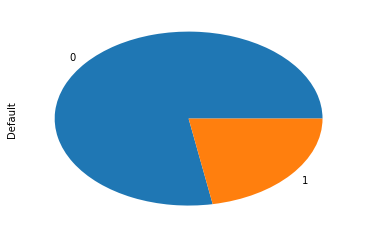

In [1900]:
credit['Default'].value_counts().plot(kind = 'pie')

In [1901]:
credit['Default'].value_counts(normalize=True).sort_values(ascending=False)

0    0.7788
1    0.2212
Name: Default, dtype: float64

Quick characteristics of class default by looking at the mean differences between two classes:

  * Total credit sum is smaller
  * Tendency to delay payments
  * Amounts of payments are lower

In [1902]:
means = credit.groupby(by=['Default']).mean()
means

,ID,Total credit,Sex,Education,Marriage,Age,Delay September,Delay August,Delay July,Delay June,...,Bill Statement July,Bill Statement June,Bill Statement May,Bill Statement April,Previous payment September,Previous payment August,Previous payment July,Previous payment June,Previous payment May,Previous payment April
Default,,,,,,,,,,,,,,,,,,,,,
0,15064.893982,178099.726074,1.614150,1.841337,1.558637,35.417266,-0.211222,-0.301917,-0.316256,-0.355633,...,47533.365605,43611.165254,40530.445343,39042.268704,6307.337357,6640.465074,5753.496833,5300.529319,5248.220296,5719.371769
1,14773.781947,130109.656420,1.567058,1.894665,1.528029,35.725738,0.668174,0.458258,0.362116,0.254521,...,45181.598855,42036.950573,39540.190476,38271.435503,3397.044153,3388.649638,3367.351567,3155.626733,3219.139542,3441.482068


## EDA + DATA CLEANING

### CATEGORICAL VARIABLES: 
### 1. SEX

Though we can't use sex variable for modeling due to legal issues, we can still explore it for some insights.

According to documentation:
  * 1 for male
  * 2 for female

Lets see if we don't have any other values:

In [1903]:
credit['Sex'].unique()

array([2, 1])

Mapping for clarity (I will change it back after EDA):

In [1904]:
c = {1:'Male', 2:'Female'}
credit['Sex'] = credit['Sex'].map(c)
credit.head()

,ID,Total credit,Sex,Education,Marriage,Age,Delay September,Delay August,Delay July,Delay June,...,Bill Statement June,Bill Statement May,Bill Statement April,Previous payment September,Previous payment August,Previous payment July,Previous payment June,Previous payment May,Previous payment April,Default
0,1,20000.0,Female,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,Female,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,Female,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,Female,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,Male,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


**Quick statistics:** Dataset consist of:
  * 60% females
  * 40% males

In [1905]:
credit['Sex'].value_counts(normalize=True)

Female    0.603733
Male      0.396267
Name: Sex, dtype: float64

**Sex and Default:**
  * Men are more likely to default than women

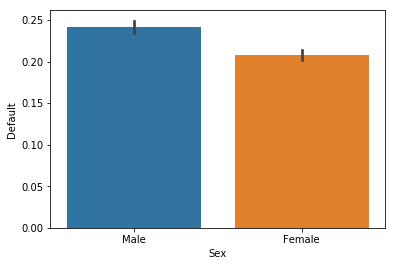

In [1906]:
sns.barplot(x='Sex', y = 'Default', data=credit, order=['Male', 'Female'])

**COMPARISON OF MEANS**

  There are no significant differences among **continuous variables** between men and women.
  However, there is a slight difference in Total Credit amount:
  * Women tend to have bigger credits

In [1907]:
sex_means1 = credit.groupby(by=['Sex'])['Total credit'].mean()
sex_means1

Sex
Female    170086.462014
Male      163519.825034
Name: Total credit, dtype: float64

**Categorical variables:**
  * Women tend to pay in advance (all negative results)
  * Delays in September among men
  * More of less same results

In [1908]:
sex_means2 = credit.groupby(by=['Sex'])['Delay September', 'Delay August', 'Delay July', 'Delay June',
       'Delay May', 'Delay April'].mean()
sex_means2

,Delay September,Delay August,Delay July,Delay June,Delay May,Delay April
Sex,,,,,,
Female,-0.069181,-0.202407,-0.230289,-0.277661,-0.316751,-0.332100
Male,0.063257,-0.029189,-0.068557,-0.133832,-0.189182,-0.228634


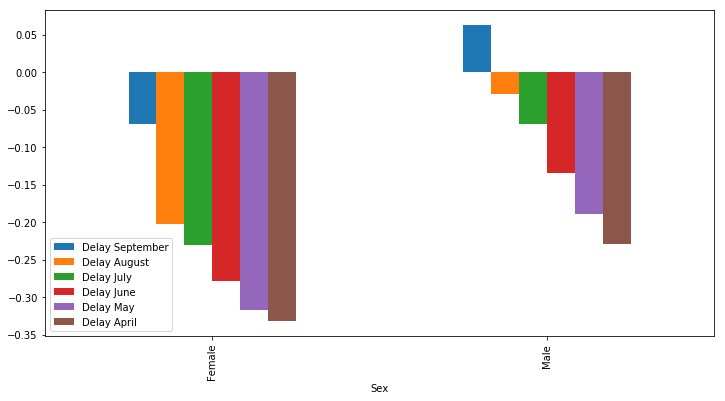

In [1909]:
sex_means2.plot(kind='bar', figsize=(12,6))

### 2. MARRIAGE

According to documentation, interpretation of values is:
  * 1 for married 
  * 2 for single
  * 3 for others (divorced, widowed, etc.)

However if we check unique values of marital status, we will spot undocumented value 0.
  It can be a missing value, unknown marital status.

In [1910]:
credit['Marriage'].unique()

array([1, 2, 3, 0])

There are only 54 of these values among 30,000, so it is not that bad

In [1911]:
(credit['Marriage'] == 0).value_counts()

False    29946
True        54
Name: Marriage, dtype: int64

**Dealing with undocumented values:**

I have joined unknown '0' values with others - '3'

In [1912]:
unknown_m = (credit['Marriage'] == 3)
credit.loc[unknown_m, 'Marriage'] = 0
credit['Marriage'].value_counts()

2    15964
1    13659
0      377
Name: Marriage, dtype: int64

Mapping to meaningful labels:

In [1913]:
m = {0:'Others', 1: 'Married', 2: 'Single'}
credit['Marriage'] = credit['Marriage'].map(m)
credit.head()

,ID,Total credit,Sex,Education,Marriage,Age,Delay September,Delay August,Delay July,Delay June,...,Bill Statement June,Bill Statement May,Bill Statement April,Previous payment September,Previous payment August,Previous payment July,Previous payment June,Previous payment May,Previous payment April,Default
0,1,20000.0,Female,2,Married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,Female,2,Single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,Female,2,Single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,Female,2,Married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,Male,2,Married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


**Quick statistics:**
Now we see the dataset contains:
  * 53% single customers
  * 46% married customers
  * 1% others

In [1914]:
credit['Marriage'].value_counts(normalize=True)

Single     0.532133
Married    0.455300
Others     0.012567
Name: Marriage, dtype: float64

**Marriage and Default:**
  * Married customers are more likely to default than single ones.
  * Other are more likely to default than singles as well, but there are only 1% of them

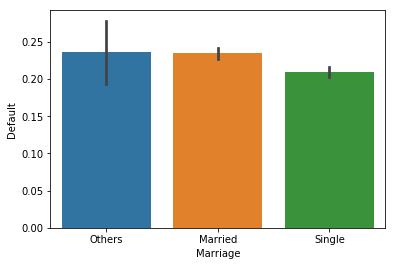

In [1915]:
sns.barplot(x='Marriage', y = 'Default', data=credit, order=['Others', 'Married', 'Single'])

**COMPARISON OF MEANS**

  There are no significant differences among **continuous variables** between married, single and others.
  The only exception is in Total Credit amount:
  * Married customers tend to have bigger credits than single
  * Customers with other marital status have significantly smaller credits (there is only 1% of them)

In [1916]:
marriage_means1 = credit.groupby(by=['Marriage'])['Total credit'].mean().sort_values(ascending=False)

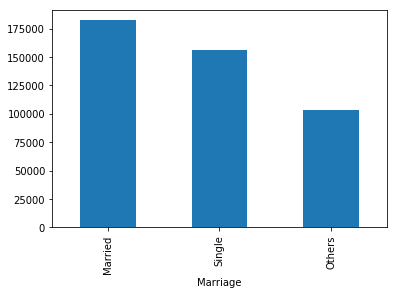

In [1917]:
marriage_means1.plot(kind='bar')

**Categorical variables**
  * Married customers tend to pay more in advance than single customers (their delays are negative)
  * Customers with other marital status tend to delay their payments (but there is only 1% of them)

In [1918]:
marriage_means2 = credit.groupby(by=['Marriage'])['Delay September', 'Delay August', 'Delay July', 'Delay June',
       'Delay May', 'Delay April'].mean()
marriage_means2

,Delay September,Delay August,Delay July,Delay June,Delay May,Delay April
Marriage,,,,,,
Married,-0.036752,-0.163262,-0.206238,-0.259243,-0.308441,-0.331064
Others,0.122016,-0.029178,-0.007958,-0.074271,-0.180371,-0.156499
Single,-0.002819,-0.111000,-0.135680,-0.191118,-0.232085,-0.260085


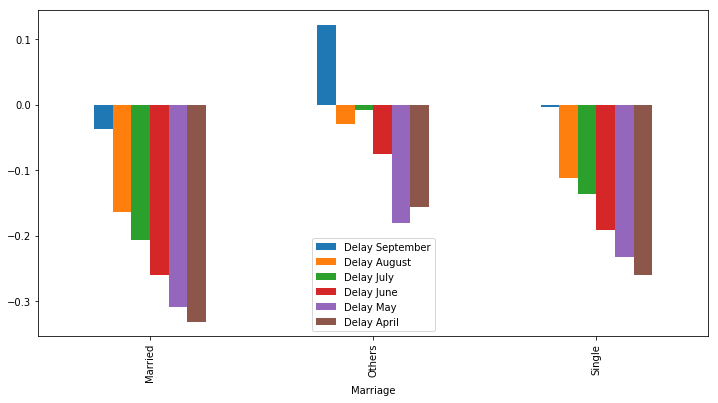

In [1919]:
marriage_means2.plot(kind='bar', figsize=(12,6))

### 3. EDUCATION

According to documentation, interpretation of values is:
  * 1 for graduate school (Master degree) 
  * 2 for university (Bachelor degree)
  * 3 for high school
  * 4 for others
  * 5 and 6 for unknown 

But again if we check unique values for education, we will see undocumented value 0 which we can interpret as unknown.

In [1920]:
credit['Education'].unique()

array([2, 1, 3, 5, 4, 6, 0])

Dataset contains only 14 rows of these values, so they wont have a high impact

In [1921]:
(credit['Education'] == 0).value_counts()

False    29986
True        14
Name: Education, dtype: int64

**Dealing with undocumented values:**

I have joined 0, 4, 5 and 6 categories in one, which represents unknown education level. 

In [1922]:
unknown = (credit['Education'] == 5) | (credit['Education'] == 6) | (credit['Education'] == 4) 
credit.loc[unknown, 'Education'] = 0
credit['Education'].value_counts()

2    14030
1    10585
3     4917
0      468
Name: Education, dtype: int64

Mapping to meaningful labels:

In [1923]:
e = {0:'Unknown', 1: 'Master', 2: 'Bachelor', 3: 'High school'}
credit['Education'] = credit['Education'].map(e)
credit.head()

,ID,Total credit,Sex,Education,Marriage,Age,Delay September,Delay August,Delay July,Delay June,...,Bill Statement June,Bill Statement May,Bill Statement April,Previous payment September,Previous payment August,Previous payment July,Previous payment June,Previous payment May,Previous payment April,Default
0,1,20000.0,Female,Bachelor,Married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,Female,Bachelor,Single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,Female,Bachelor,Single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,Female,Bachelor,Married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,Male,Bachelor,Married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


**Quick statistics:**
  * 47% customers with Bachelor degree
  * 35% customers with Master degree
  * 16% customers who finished high school
  * 2% customers whose education level is unknown

In [1924]:
credit['Education'].value_counts(normalize=True)

Bachelor       0.467667
Master         0.352833
High school    0.163900
Unknown        0.015600
Name: Education, dtype: float64

**Education and Default:**
  * The lower education lever, the higher chance to default
  * Customers with unknown level of education has the lowest chance to default (though, there is only 2% of them)

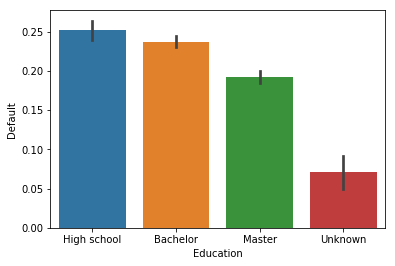

In [1925]:
sns.barplot(x='Education', y = 'Default', data=credit, order=['High school', 'Bachelor', 'Master', 'Unknown'])

**COMPARISON OF MEANS**

  The main difference between customers with distinct level of education among **continuous variables**:
  * Customers with Master degree have the biggest credits
  * Interesting thing is that 'Unknown' category has second biggest credits (there is only 2% of them)
  * They are followed by Barchelors and customers with high school education (smallest credits)
  * Masters have biggest Bill Statements and Previous Payments amounts, which is logical, so nothing interesting here

In [1926]:
education_means1 = credit.groupby(by=['Education'])['Total credit'].mean().sort_values(ascending=False)

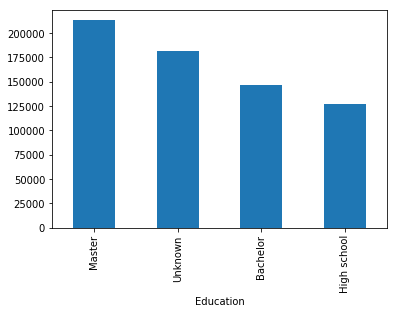

In [1927]:
education_means1.plot(kind='bar')

**Categorical variables:**
  * Masters and customers with unknown level of education have similar trends of delays: they tend to pay in advance
  * Bachelors and customers with high school education also share similarities: they tend to delay their payments
  * However, customers with high school education seem to delay even more than Bachelors

In [1928]:
education_means2 = credit.groupby(by=['Education'])['Delay September', 'Delay August', 'Delay July', 'Delay June',
       'Delay May', 'Delay April'].mean()
education_means2

,Delay September,Delay August,Delay July,Delay June,Delay May,Delay April
Education,,,,,,
Bachelor,0.102210,0.022523,-0.018532,-0.083036,-0.141411,-0.170848
High school,0.132805,0.040879,0.002644,-0.066504,-0.139313,-0.183649
Master,-0.233916,-0.408125,-0.425886,-0.461974,-0.479074,-0.485971
Unknown,-0.239316,-0.448718,-0.493590,-0.508547,-0.525641,-0.617521


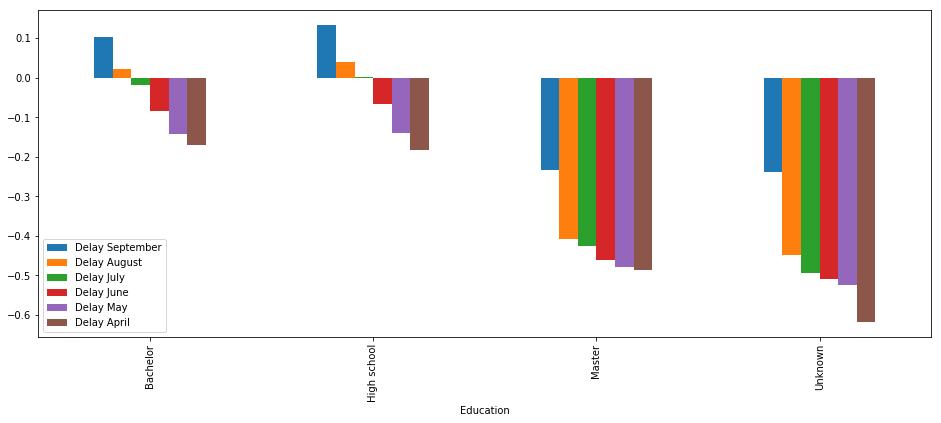

In [1929]:
education_means2.plot(kind='bar', figsize=(16,6))

**Education and Marriage:**
  * A lot more Masters among single
  * More Barchelors among married
 
**Different balances of education level among single, married and others:**
  * Single: 44% Bachelors, 43% Masters, 12% High School
  * Married: 50% Bachelors, 27% Masters, 21% High School
  * Others: 45% Bachelors, 14% Masters, 39% High School

In [1930]:
pd.crosstab(credit['Education'], credit['Marriage'], normalize='columns')

Marriage,Married,Others,Single
Education,,,
Bachelor,0.500915,0.445623,0.439739
High school,0.209459,0.389920,0.119582
Master,0.272494,0.143236,0.426522
Unknown,0.017132,0.021220,0.014157


**Default by Education, Marital Status**

We can't use sex as predictor for a model, so lets eliminate sex and look at the results:

TOP 5 troublemakers:
  * 25% of all defaults are caused by married customers with Bachelor degree
  * 24% of all defaults are caused by single customers with Bachelor degree
  * 19% of all defaults are caused by single customers with Master degree
  * 12% of all defaults are caused by married customers with Master degree
  * 11% of all defaults are caused by married customers with high school education


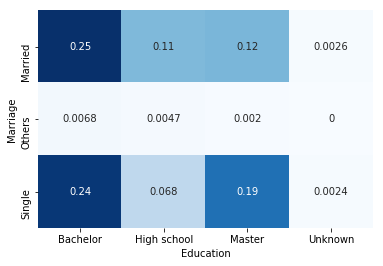

In [1932]:
categor_default_legal = pd.crosstab(credit['Marriage'], credit['Education'], values=credit['Default'],
           aggfunc='sum', normalize=True)
sns.heatmap(categor_default_legal, cmap='Blues', annot=True, cbar=False)

### 4. DELAY SEPTEMBER

Documentation + common sense:
  * -2, -1 months paid in advance
  * 0 paid duly
  * 1, 2, 3, 4, 5, 6, 7, 8 months delayed

**Quick statistics:**
  * 49% pay duly
  * 28% pay in advance
  * 23% delays payments

In [1933]:
credit['Delay September'].value_counts(normalize=True)

 0    0.491233
-1    0.189533
 1    0.122933
-2    0.091967
 2    0.088900
 3    0.010733
 4    0.002533
 5    0.000867
 8    0.000633
 6    0.000367
 7    0.000300
Name: Delay September, dtype: float64

**Delay September and Default:**
  * 1 month delayed payment increases chances to default 2X
  * 2 months of delayed payment increases chances to default 4X

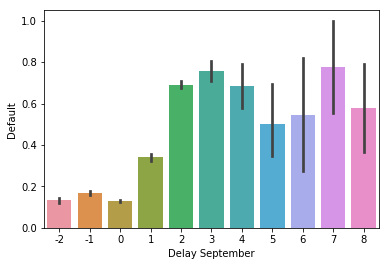

In [1934]:
sns.barplot(x='Delay September', y = 'Default', data=credit)

Lets see what happens if we join delay months in 4 categories:
  * paid in advance (-1,-2)
  * paid duly (0)
  * 1-2 month delays
  * 3-8 month delays

Creating a copy of a column:

In [1935]:
credit['Delay September bins'] = credit['Delay September']

In [1936]:
first = (credit['Delay September bins'] == -2) | (credit['Delay September bins'] == -1)
credit.loc[first, 'Delay September bins'] = 'Advance'
second = (credit['Delay September bins'] == 0)
credit.loc[second, 'Delay September bins'] = 'Duly'
third = (credit['Delay September bins'] == 1) | (credit['Delay September bins'] == 2)
credit.loc[third, 'Delay September bins'] = '1-2 months'
fourth = (credit['Delay September bins'] == 3) | (credit['Delay September bins'] == 4) | (credit['Delay September bins'] == 5) | (credit['Delay September bins'] == 6) | (credit['Delay September bins'] == 7) | (credit['Delay September bins'] == 8)
credit.loc[fourth, 'Delay September bins'] = '3-8 months'
credit['Delay September bins'].value_counts(normalize=True)

Duly          0.491233
Advance       0.281500
1-2 months    0.211833
3-8 months    0.015433
Name: Delay September bins, dtype: float64

**COMPARISON OF MEANS**

  The main difference between customers with distinct level of education among **continuous variables**:
  * Those who pay in advance have much bigger credits
  * Then, by level of delays, total credit amount gradually decreases
  * Those with 3-8 months delays have the smallest credits
  * Those who pay duly receive bigger bill statements
  

In [1937]:
delay_means1 = credit.groupby(by=['Delay September bins'])['Total credit', 'Bill Statement September', 'Bill Statement August',
          'Bill Statement July', 'Bill Statement June', 'Bill Statement May', 'Bill Statement April',
          'Previous payment September', 'Previous payment August', 'Previous payment July', 
          'Previous payment June','Previous payment May', 'Previous payment April'].mean().sort_values(by='Total credit', ascending=False)
delay_means1

,Total credit,Bill Statement September,Bill Statement August,Bill Statement July,Bill Statement June,Bill Statement May,Bill Statement April,Previous payment September,Previous payment August,Previous payment July,Previous payment June,Previous payment May,Previous payment April
Delay September bins,,,,,,,,,,,,,
Advance,221020.722321,9932.099586,10245.394671,11729.922202,12087.547306,11467.448905,11084.171107,7095.628774,8061.774186,6893.746477,5782.058259,5711.994198,6581.462404
Duly,154265.025446,78417.889462,74238.192509,69448.018864,62659.819231,57776.063921,55668.092285,6082.560019,5854.076474,5323.468752,5171.571147,5166.093303,5406.656850
1-2 months,133141.778127,42989.412903,42701.733438,41781.304327,39594.411959,37955.826908,36724.238080,3141.657278,3577.067978,3048.945555,2969.253501,2870.397010,3068.402518
3-8 months,83131.749460,51795.226782,50609.369330,48293.321814,44857.209503,42860.235421,40569.714903,822.701944,1186.673866,1565.330454,1878.561555,2958.419006,3686.883369


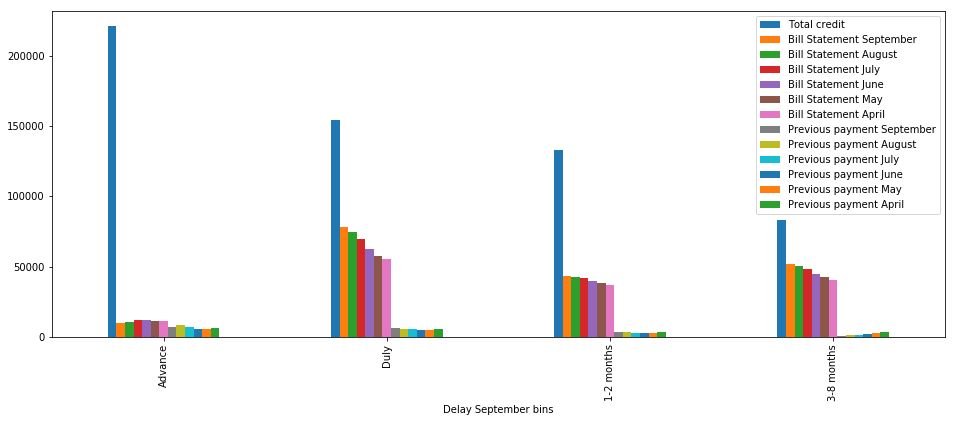

In [1938]:
delay_means1.plot(kind='bar', figsize=(16,6))

**Delays, Marriage, Education and Default:**

TOP risk groups:
  * 12% of all defaults caused by married customers with Bachelor degree and 1-2 months delay status (age mean 39)
  * 11% of all defaults caused by single customers with Bachelor degree and 1-2 months delay status (age mean 30)
  * 8,4% of all defaults caused by single customers with Master degree and 1-2 months delay status (age mean 35)
  * 8,1% of all defaults caused by single customers with Bachelor degree who pay duly (age mean 31)
  * 7,8% of all defaults caused by married customers with Bachelor degree who pay duly (age mean 38)

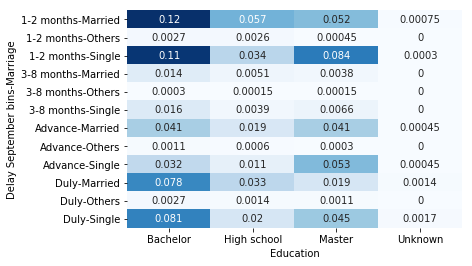

In [1939]:
dels_default = pd.crosstab([credit['Delay September bins'], credit['Marriage']], credit['Education'], 
                           values=credit['Default'], aggfunc='sum', normalize=True)
sns.heatmap(dels_default, cmap='Blues', annot=True, cbar=False)

### CONTINUOUS VARIABLES:
### 1. AGE

Ages in dataset:

In [1940]:
credit['Age'].describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: Age, dtype: float64

Distribution of age is skewed to the right - it may cause problems for regression models because of its outliers.
Needs log transformation.

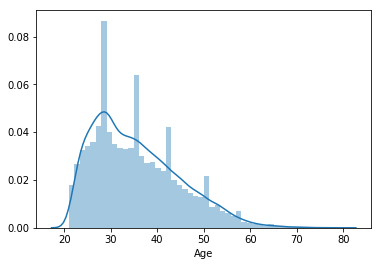

In [1941]:
sns.distplot(credit['Age'])

**Creating age bins:**

I will create 6 age bins to make further analysis more comprehensive:
  * age 21-30
  * age 31-40
  * age 41-50
  * age 51-60
  * age 61-70
  * age 71-79

Function for age bins:

In [1942]:
def bins(a):
    if a >= 21 and a < 31:
        return '21-30'
    elif a >=31 and a < 41:
        return '31-40' 
    elif a >=41 and a < 51:
        return '41-50'
    elif a >=51 and a < 61:
        return '51-60'
    elif a >=61 and a < 71:
        return '61-70'
    else:
        return '71-79'

Creating new column with categorical values 'Age bins':

In [1943]:
credit['Age bins'] = credit['Age'].apply(bins)
credit.head()

,ID,Total credit,Sex,Education,Marriage,Age,Delay September,Delay August,Delay July,Delay June,...,Bill Statement April,Previous payment September,Previous payment August,Previous payment July,Previous payment June,Previous payment May,Previous payment April,Default,Delay September bins,Age bins
0,1,20000.0,Female,Bachelor,Married,24,2,2,-1,-1,...,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,1-2 months,21-30
1,2,120000.0,Female,Bachelor,Single,26,-1,2,0,0,...,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,Advance,21-30
2,3,90000.0,Female,Bachelor,Single,34,0,0,0,0,...,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,Duly,31-40
3,4,50000.0,Female,Bachelor,Married,37,0,0,0,0,...,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,Duly,31-40
4,5,50000.0,Male,Bachelor,Married,57,-1,0,-1,0,...,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,Advance,51-60


**Quick statistics:**
  * 37% of all customers are 21-30 years old
  * 36% of all customers are 31-40 years old
  * 20% of all customers are 41-50 years old
  * 7% of all customers are older than 50 years

In [1944]:
credit['Age bins'].value_counts(normalize=True)

21-30    0.367100
31-40    0.357100
41-50    0.200167
51-60    0.066567
61-70    0.008567
71-79    0.000500
Name: Age bins, dtype: float64

**Age and Default:**
  * Least likely to default are 31-40 years old
  * Most likely to default are older than 50 years old (only 7% of all customers)
  * The differences among all age bins are slightly noticeable

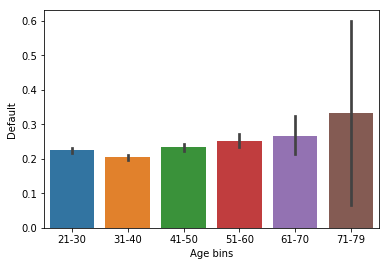

In [1945]:
sns.barplot(x='Age bins', y = 'Default', data=credit, order=['21-30', '31-40', '41-50', '51-60', '61-70', '71-79'])

**COMPARISON OF MEANS**

  **Continuous variables**:
  * Customers, who are older than 60 years old have biggest credits, though there are not so many of them
  * If we will ignore those outliers, the 31-40 age bin has biggest credits
  * Customers under 30 have smallest credits
  

In [1946]:
age_means1 = credit.groupby(by=['Age bins'])['Total credit'].mean().sort_values(ascending=False)

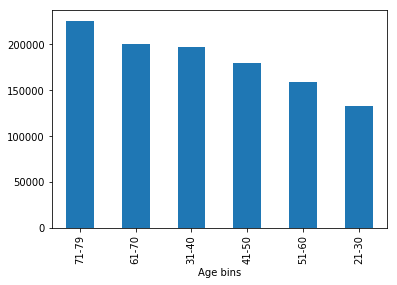

In [1947]:
age_means1.plot(kind='bar')

### 2. TOTAL CREDIT

Description of Total credit variable. Standard deviation is very high: numbers are spread out.

In [1948]:
credit['Total credit'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: Total credit, dtype: float64

Distribution of total credit is skewed to the right - it may cause problems for regression models because of its outliers.
Needs transformation.

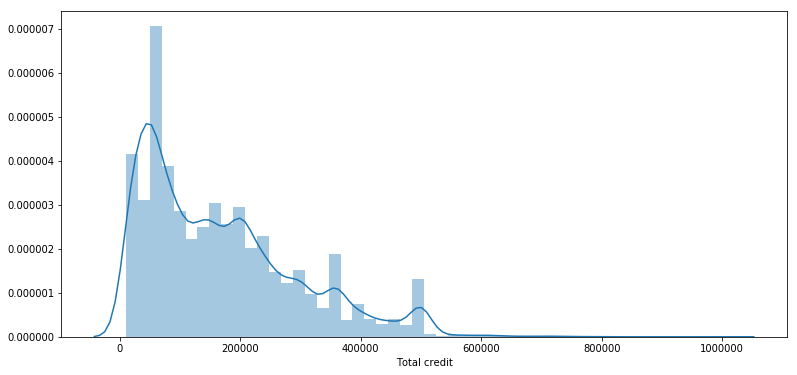

In [1949]:
fig, ax = plt.subplots(figsize=(13,6)) 

sns.distplot(credit['Total credit'], ax=ax)

**Creating total credit bins:**

I will create 5 total credit bins to make further analysis more comprehensive:
  * 10,000 - 100,000
  * 100,000 - 200,000
  * 200,000 - 300,000
  * 300,000 - 400,000
  * above 400,000

Function for total credit bins:

In [1950]:
def bins_for_credit(a):
    if a >= 10000 and a < 100000:
        return '10,000-100,000'
    elif a >=100000 and a < 200000:
        return '100,000-200,000' 
    elif a >=200000 and a < 300000:
        return '200,000-300,000'
    elif a >=300000 and a < 400000:
        return '300,000-400,000'
    else:
        return 'above 400,000'

Creating new column for total credit bins:

In [1951]:
credit['Total credit bins'] = credit['Total credit'].apply(bins_for_credit)
credit.head()

,ID,Total credit,Sex,Education,Marriage,Age,Delay September,Delay August,Delay July,Delay June,...,Previous payment September,Previous payment August,Previous payment July,Previous payment June,Previous payment May,Previous payment April,Default,Delay September bins,Age bins,Total credit bins
0,1,20000.0,Female,Bachelor,Married,24,2,2,-1,-1,...,0.0,689.0,0.0,0.0,0.0,0.0,1,1-2 months,21-30,"10,000-100,000"
1,2,120000.0,Female,Bachelor,Single,26,-1,2,0,0,...,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,Advance,21-30,"100,000-200,000"
2,3,90000.0,Female,Bachelor,Single,34,0,0,0,0,...,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,Duly,31-40,"10,000-100,000"
3,4,50000.0,Female,Bachelor,Married,37,0,0,0,0,...,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,Duly,31-40,"10,000-100,000"
4,5,50000.0,Male,Bachelor,Married,57,-1,0,-1,0,...,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,Advance,51-60,"10,000-100,000"


**Quick statistics:**
  * 10,000 - 100,000: 38% of customers
  * 100,000 - 200,000: 25% of customers
  * 200,000 - 300,000: 20% of customers
  * 300,000 - 400,000: 10% of customers
  * above 400,000: 7% of customers

In [1952]:
credit['Total credit bins'].value_counts(normalize=True)

10,000-100,000     0.381667
100,000-200,000    0.246667
200,000-300,000    0.201100
300,000-400,000    0.101400
above 400,000      0.069167
Name: Total credit bins, dtype: float64

**Total credit bins and default:**
  * The smaller the sum of your credit - more likely to default

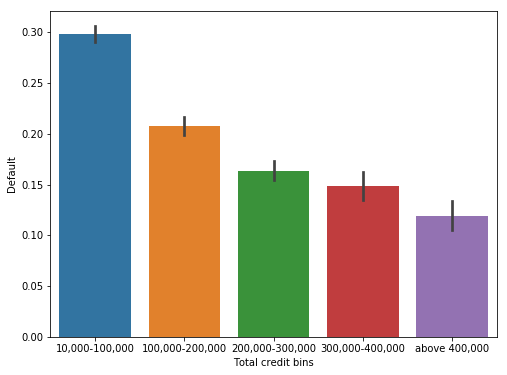

In [1953]:
fig, ax = plt.subplots(figsize=(8,6)) 

sns.barplot(x='Total credit bins', y = 'Default', data=credit, ax=ax, 
            order=['10,000-100,000', '100,000-200,000', '200,000-300,000', '300,000-400,000', 'above 400,000'])

**Total credit limit, Delays, Marriage, Education and Default:**

TOP risk groups:
  * 7,6% of all defaults caused by single customers with Bachelor degree, 1-2 months delay status and credit limit under 100,000
  * 6,4% of all defaults caused by married customers with Bachelor degree, 1-2 months delay status and credit limit under 100,000
  * 5,2% of all defaults caused by sinle customers with Bachelor degree, who pay duly and have credit limit under 100,000
  * 4,9% of all defaults caused by married customers with Bachelor degree, who pay duly and have credit limit under 100,000
  * 4% of all defaults caused by married customers with high school level of education, 1-2 months delay status and have credit limit under 100,000

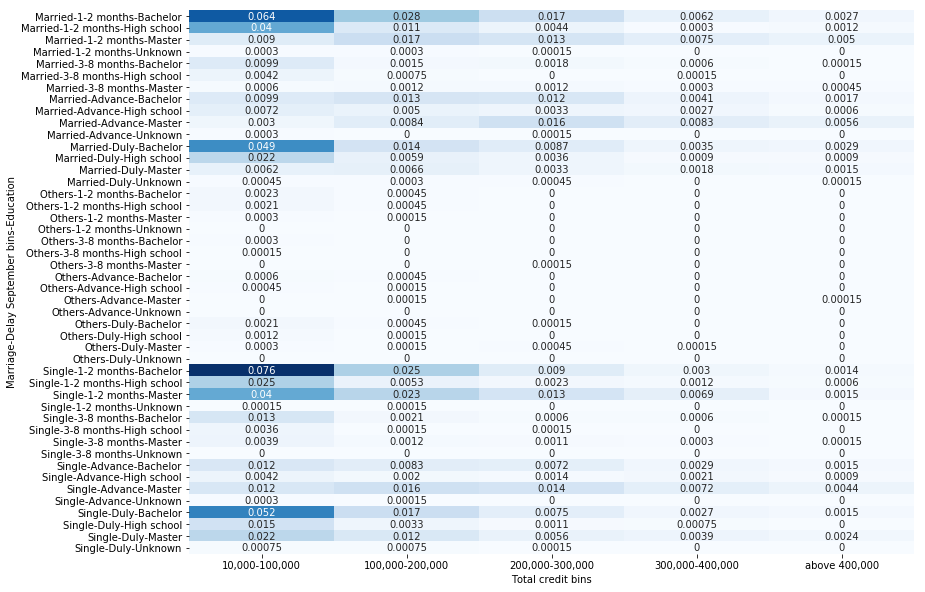

In [1962]:
limit_m_default = pd.crosstab([credit['Marriage'], credit['Delay September bins'], credit['Education']], credit['Total credit bins'], 
                           values=credit['Default'], aggfunc='sum', normalize=True)

fig, ax = plt.subplots(figsize=(13,10)) 
sns.heatmap(limit_m_default, cmap='Blues', annot=True, cbar=False, ax=ax)

### CALCULATED COLUMNS

Creating new columns for further analysis (and for eliminating multicollinearity between those columns):
  * Total statement
  * Total payment
  * Total statement - Total payment = Debt

In [1964]:
credit['Total statement'] = (credit['Bill Statement September'] + credit['Bill Statement August'] + credit['Bill Statement July'] +
credit['Bill Statement June'] + credit['Bill Statement May'] + credit['Bill Statement April'])

In [1965]:
credit['Total payment'] = (credit['Previous payment September'] + credit['Previous payment August'] + credit['Previous payment July'] +
credit['Previous payment June'] + credit['Previous payment May'] + credit['Previous payment April'])

In [1966]:
credit['Debt'] = credit['Total statement'] - credit['Total payment']
credit.head()

,ID,Total credit,Sex,Education,Marriage,Age,Delay September,Delay August,Delay July,Delay June,...,Previous payment June,Previous payment May,Previous payment April,Default,Delay September bins,Age bins,Total credit bins,Total statement,Total payment,Debt
0,1,20000.0,Female,Bachelor,Married,24,2,2,-1,-1,...,0.0,0.0,0.0,1,1-2 months,21-30,"10,000-100,000",7704.0,689.0,7015.0
1,2,120000.0,Female,Bachelor,Single,26,-1,2,0,0,...,1000.0,0.0,2000.0,1,Advance,21-30,"100,000-200,000",17077.0,5000.0,12077.0
2,3,90000.0,Female,Bachelor,Single,34,0,0,0,0,...,1000.0,1000.0,5000.0,0,Duly,31-40,"10,000-100,000",101653.0,11018.0,90635.0
3,4,50000.0,Female,Bachelor,Married,37,0,0,0,0,...,1100.0,1069.0,1000.0,0,Duly,31-40,"10,000-100,000",231334.0,8388.0,222946.0
4,5,50000.0,Male,Bachelor,Married,57,-1,0,-1,0,...,9000.0,689.0,679.0,0,Advance,51-60,"10,000-100,000",109339.0,59049.0,50290.0


### MAPPING CATEGORICAL VALUES BACK TO ENCODED VALUES
#### SEX, EDUCATION, MARRIAGE

In [2002]:
sm = {'Male':0, 'Female':1}
credit['Sex'] = credit['Sex'].map(sm)

In [2003]:
em = {'Bachelor':2, 'Master':3, 'High school':1, 'Unknown':0}
credit['Education'] = credit['Education'].map(em)

In [2004]:
mm = {'Married':2, 'Single':1, 'Others':0}
credit['Marriage'] = credit['Marriage'].map(mm)

In [2005]:
credit.head()

,ID,Total credit,Sex,Education,Marriage,Age,Delay September,Delay August,Delay July,Delay June,...,Previous payment May,Previous payment April,Default,Delay September bins,Age bins,Total credit bins,Total statement,Total payment,Debt,Total payment bins
0,1,20000.0,1,2,2,24,2,2,-1,-1,...,0.0,0.0,1,1-2 months,21-30,"10,000-100,000",7704.0,689.0,7015.0,"1-5,000"
1,2,120000.0,1,2,1,26,-1,2,0,0,...,0.0,2000.0,1,Advance,21-30,"100,000-200,000",17077.0,5000.0,12077.0,"1-5,000"
2,3,90000.0,1,2,1,34,0,0,0,0,...,1000.0,5000.0,0,Duly,31-40,"10,000-100,000",101653.0,11018.0,90635.0,"10,001-20,000"
3,4,50000.0,1,2,2,37,0,0,0,0,...,1069.0,1000.0,0,Duly,31-40,"10,000-100,000",231334.0,8388.0,222946.0,"5,001-10,000"
4,5,50000.0,0,2,2,57,-1,0,-1,0,...,689.0,679.0,0,Advance,51-60,"10,000-100,000",109339.0,59049.0,50290.0,"40,001-60,000"


### STANDARTIZATION

In [1669]:
from sklearn.preprocessing import StandardScaler

In [1670]:
ss = StandardScaler()

Columns to be transformed:

In [1671]:
cols = ['Total credit','Age','Bill Statement September',
       'Bill Statement August', 'Bill Statement July', 'Bill Statement June',
       'Bill Statement May', 'Bill Statement April',
       'Previous payment September', 'Previous payment August',
       'Previous payment July', 'Previous payment June',
       'Previous payment May', 'Previous payment April',
       'Total statement', 'Total payment', 'Debt']

In [1672]:
credit[cols] = ss.fit_transform(credit[cols])
credit.head()

,ID,Total credit,Sex,Education,Marriage,Age,Delay September,Delay August,Delay July,Delay June,...,Previous payment June,Previous payment May,Previous payment April,Default,Delay September bins,Age bins,Total credit bins,Total statement,Total payment,Debt
0,1,-1.136720,1,2,2,-1.246020,2,2,-1,-1,...,-0.308063,-0.314136,-0.293382,1,1-2 months,21-30,"10,000-100,000",-0.690692,-0.509027,-0.636623
1,2,-0.365981,1,2,1,-1.029047,-1,2,0,0,...,-0.244230,-0.314136,-0.180878,1,Advance,21-30,"100,000-200,000",-0.665997,-0.438153,-0.622684
2,3,-0.597202,1,2,1,-0.161156,0,0,0,0,...,-0.244230,-0.248683,-0.012122,0,Duly,31-40,"10,000-100,000",-0.443170,-0.339216,-0.406365
3,4,-0.905498,1,2,2,0.164303,0,0,0,0,...,-0.237846,-0.244166,-0.237130,0,Duly,31-40,"10,000-100,000",-0.101507,-0.382454,-0.042032
4,5,-0.905498,0,2,2,2.334029,-1,0,-1,0,...,0.266434,-0.269039,-0.255187,0,Advance,51-60,"10,000-100,000",-0.422920,0.450421,-0.517460


### HEATMAP
#### CHECK FOR CORRELATION AND MULTICOLLINEARITY

In [1673]:
al_all = credit[['Total credit', 'Sex', 'Education', 'Marriage', 'Age',
       'Delay September', 'Delay August', 'Delay July', 'Delay June',
       'Delay May', 'Delay April', 'Bill Statement September',
       'Bill Statement August', 'Bill Statement July', 'Bill Statement June',
       'Bill Statement May', 'Bill Statement April',
       'Previous payment September', 'Previous payment August',
       'Previous payment July', 'Previous payment June',
       'Previous payment May', 'Previous payment April', 'Default',
       'Total statement', 'Total payment', 'Debt']]

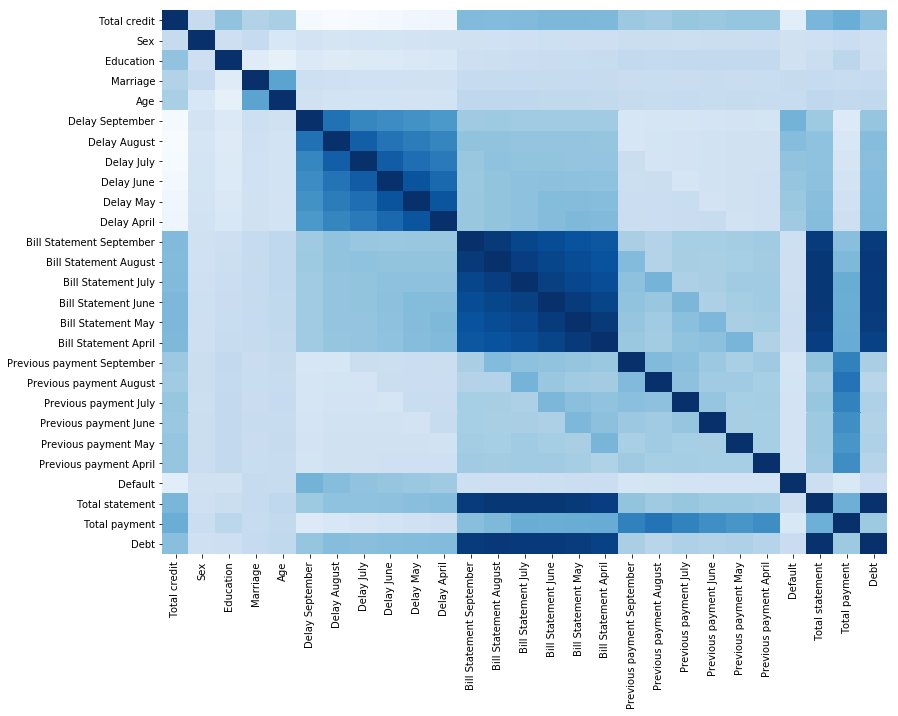

In [1674]:
fig, ax = plt.subplots(figsize=(13,10)) 

sns.heatmap(al_all.corr(), ax=ax, cmap='Blues', cbar=False)

Selecting variables which correlate with Default, but eliminating those, who have strong correlation among themselves:

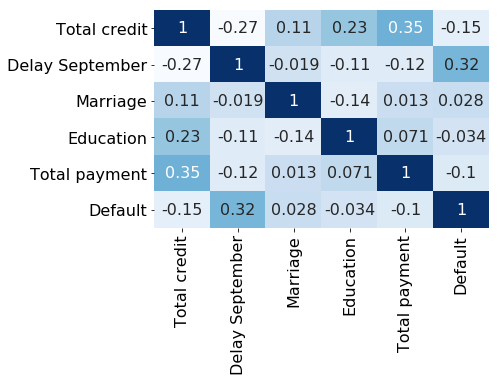

In [1774]:
relevant = credit[['Total credit', 'Delay September','Marriage', 'Education', 'Total payment','Default']]

sns.heatmap(relevant.corr(), annot=True, cmap='Blues', cbar=False)

# MODELING

### TRAIN-TEST SPLIT

In [575]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, confusion_matrix, f1_score

In [1821]:
features = ['Delay September', 'Total payment', 'Marriage', 'Education', 'Total credit']

In [1822]:
X = credit[features]
y = credit['Default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [1823]:
X_train.shape

(24000, 5)

In [1824]:
X_test.shape

(6000, 5)

### 1. RANDOM FOREST

Random forest model aggregates a bunch of descision trees and presents the average result of all descision tree predictions, thus reduces the variance. Each tree is trained on random samples of the dataset. 

### Randomized Search CV

Used for parameter tuning in a classification model

In [1777]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [1778]:
from sklearn.ensemble import RandomForestRegressor

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 34.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 66.0min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


**Best parameters of Randomized Search CV:**

We will use these to narrow the search with GridSearchCV 

In [1779]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

### GRID SEARCH CV

In [1792]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [20, 30, 40, 50],
    'max_features': ['sqrt'],
    'min_samples_leaf': [2, 3, 4],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [600, 800, 1000, 1200]
}

# Create a based model
rf = RandomForestRegressor()# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [1793]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 17.1min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 39.7min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed: 47.5min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth':

**Best parameters found by GridSearchCV:**

We will use these in our Random Forest model

In [1794]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 12,
 'n_estimators': 1000}

Training the model:

In [1795]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 1000 trees
model = RandomForestClassifier(n_estimators = 1000,
                               bootstrap = True,
                               max_features = 'sqrt',
                               max_depth = 10,
                               min_samples_split = 12,
                               min_samples_leaf = 4,
                               class_weight='balanced')
# Fit on training data
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features='sqrt',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=4,
                       min_samples_split=12, min_weight_fraction_leaf=0.0,
                       n_estimators=1000, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

Calculating probabilities and predictions:

In [1870]:
train_rf_predictions = model.predict(X_train)

train_rf_probs = model.predict_proba(X_train)[:, 1]

rf_predictions = model.predict(X_test)

rf_probs = model.predict_proba(X_test)[:, 1]

#### FEATURE IMPORTANCE

In [1845]:
fi_model = pd.DataFrame({'feature': features,
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi_model

,feature,importance
0,Delay September,0.560509
1,Total payment,0.240798
4,Total credit,0.147242
3,Education,0.032766
2,Marriage,0.018685


#### METRICS

**1. Accuracy.**
Proportion of true results among the total number of cases examined

For imbalanced dataset accuracy is not a best metric

In [1846]:
accuracy_score(y_test, rf_predictions)

0.7816666666666666

**2. Precision.** What proportion of predicted positives is truly positive. TP/ TP + FP

In [1847]:
precision_score(y_test, rf_predictions)

0.5058032987171656

**3. Recall.** What proportion of actual positives is correctly classified. TP/ TP + FN

In our case, we want to predict as many positives as we can (even if we are not sure) to avoid customers, who will default

In [1848]:
recall_score(y_test, rf_predictions)

0.6230248306997742

**4. F1 Score.** Balance between precision and recall

In [1849]:
f1_score(y_test, rf_predictions)

0.5583277140930546

**5. Confusion matrix.**

In [1850]:
cm = confusion_matrix(y_test, rf_predictions)

TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]

print('True Negative: {}'.format(TN) + '\n'
'False Negative: {}'.format(FN) + '\n'
'True Positive: {}'.format(TP) + '\n'
'False Positive: {}'.format(FP))

True Negative: 3862
False Negative: 501
True Positive: 828
False Positive: 809


**6. ROC-AUC value.** Trade-off between precision and recall. 50% score says that model is useless: as good as blind guessing, so the higher the rate, the better

In [1851]:
roc_auc_score(y_test, rf_probs)

0.8057700854688463

### 2. LOGISTIC REGRESSION

In [721]:
from sklearn.linear_model import LogisticRegression

Initializing logistic regression and fitting the model:

In [1680]:
log_reg = LogisticRegression(class_weight='balanced')

In [1852]:
log_reg.fit(X_train, y_train)

/Users/viktorijakasirskaja/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Calculating probabilities and predictions:

In [1869]:
train_predictions = log_reg.predict(X_train)

train_probs = log_reg.predict_proba(X_train)[:, 1]

log_predictions = log_reg.predict(X_test)

log_probs = log_reg.predict_proba(X_test)[:, 1]

In [1862]:
log_predictions

array([1, 0, 0, ..., 0, 0, 1])

#### FEATURE IMPORTANCE

In [1854]:
fi_model2 = pd.DataFrame({'feature': features,
                   'importance': list(log_reg.coef_[0])}).\
                    sort_values('importance', ascending = False)
fi_model2

,feature,importance
0,Delay September,0.596334
2,Marriage,0.224539
3,Education,0.089796
4,Total credit,-0.166326
1,Total payment,-0.308367


#### METRICS

**1. Accuracy score**

In [1863]:
accuracy_score(y_test, log_predictions)

0.6743333333333333

**2. Precision score**

In [1864]:
precision_score(y_test, log_predictions)

0.3659373659373659

**3. Recall score**

In [1865]:
recall_score(y_test, log_predictions)

0.6418359668924003

**4. F1 score**

In [1866]:
f1_score(y_test, log_predictions)

0.4661202185792349

**5. Confusion matrix**

In [1867]:
cm2 = confusion_matrix(y_test, log_predictions)

TN2 = cm2[0][0]
FN2 = cm2[1][0]
TP2 = cm2[1][1]
FP2 = cm2[0][1]

print('True Negative: {}'.format(TN2) + '\n'
'False Negative: {}'.format(FN2) + '\n'
'True Positive: {}'.format(TP2) + '\n'
'False Positive: {}'.format(FP2))

True Negative: 3193
False Negative: 476
True Positive: 853
False Positive: 1478


**6. ROC-AUC score**

In [1868]:
roc_auc_score(y_test, log_probs)

0.7224144010745261

#### SOME NOTES:

**Unbalanced model** = Higher accuracy, Higher precision, Lower recall, Lower f1 score (a lot of false negative)

**Balanced model** = Lower accuracy, Lower precision, Higher(3X) recall, Higher f1 score (a lot of false positive).

**Outliers** = removing outliers adds to precision, but recall decreases

For bank it is more important to have higher recall than precision, because the cost of giving a credit
to customers who will default is higher than not giving a credit to customers who won't default.

### ROC CURVES

#### RANDOM FOREST ROC

Function for model evaluation and visualizing ROC curve:

Code from here: https://github.com/WillKoehrsen/Machine-Learning-Projects/blob/master/Random%20Forest%20Tutorial.ipynb

In [1878]:
def evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(y_test, [1 for _ in range(len(y_test))])
    baseline['precision'] = precision_score(y_test, [1 for _ in range(len(y_test))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(y_test, rf_predictions)
    results['precision'] = precision_score(y_test, rf_predictions)
    results['roc'] = roc_auc_score(y_test, rf_probs)
    
    train_results = {}
    train_results['recall'] = recall_score(y_train, train_rf_predictions)
    train_results['precision'] = precision_score(y_train, train_rf_predictions)
    train_results['roc'] = roc_auc_score(y_train, train_rf_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(y_test, [1 for _ in range(len(y_test))])
    model_fpr, model_tpr, _ = roc_curve(y_test, rf_probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curve');

**ROC curve:**

ROC is probability curve which shows models capability to predict 0 as 0 and 1 as 1. 

AUC show much model is capable of distinguishing between classes.

Recall Baseline: 1.0 Test: 0.62 Train: 0.62
Precision Baseline: 0.22 Test: 0.51 Train: 0.52
Roc Baseline: 0.5 Test: 0.81 Train: 0.81


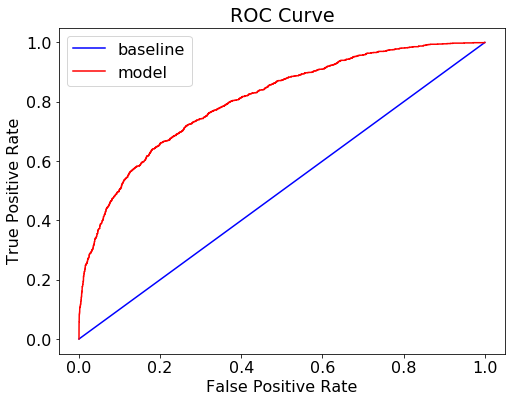

In [1879]:
evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)

#### LOGISTIC REGRESSION ROC

Recall Baseline: 1.0 Test: 0.64 Train: 0.64
Precision Baseline: 0.22 Test: 0.37 Train: 0.37
Roc Baseline: 0.5 Test: 0.72 Train: 0.72


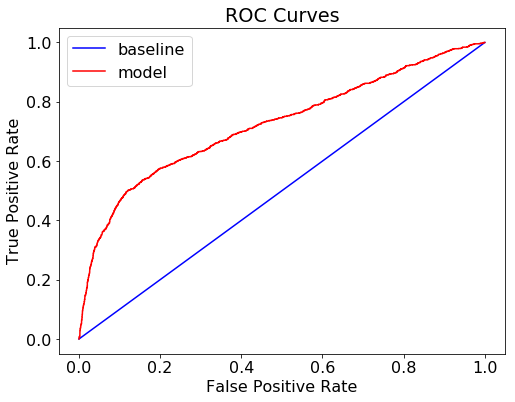

In [1871]:
evaluate_model(log_predictions, log_probs, train_predictions, train_probs)

### CONCLUSION

**Sex:**
  * More women than man (60% and 40%)
  * Men are more likely to default, though, difference is not significant
  * Women tend to pay in advance
  * Women tend to have higher total credit limit
 
**Marriage:**
   * 53% single, 46% married, 1% other
   * More % of defaults are caused by married customers
   * Married customers have higher total credit limit
   * Married customers tend to pay in advance
 
**Education:**
   * 47% Bachelors, 35% Masters, 16% High School, 2% unknown
   * The lower the education, the higher chances to default
   * Masters have significantly higher total credit limit
   * Masters tend to pay in advance
   * Bachelors and customers with high school level of education have similar delay trends
   
**Delays:**
  * 49% pays duly, 28% pays in advance, 23% delays their payments
  * 1 month delay increases % of default 2X, 2 months delay - 4X

**Age:**
  * 73% of customers are under 40
  * 31-40 group has the lowest chance to default
  * The older the customer is, the higher chance to default
  
**Total credit limit:**
  * 38% of customers has total credit limit under 100,000
  * They also are more likely to default
  
**Classification models:**

Random Forest model performs better than Logistic Regression model (80% roc-auc score against 72%). Though result is not perfect. I think this dataset misses some critical information like what are the earnings of customer and whether they have other credits, maybe this data would improve our predictions.